In [9]:
import pandas as pd
import numpy as np
copy_movies_page_info = pd.read_csv('movie_data.csv')

In [10]:
copy_movies_page_info

,title,MPAA_rate,domestic_gross_pay,worldwide_gross_pay,budget,lifetime_ranking,running_time,distributor,genre,top_director,top_actor,first_genre,second_genre,third_genre,fourth_genre
0,See Spot Run,PG,33357476,43057552.0,35000000.0,NaN,94.0,Warner Bros.,Action Comedy Crime ...,George Gallo,David Arquette,Action,Comedy,Crime,Family
1,Teen Wolf,PG,33086611,NaN,NaN,NaN,91.0,Atlantic Releasing Corporation,Comedy Fantasy Romance,Jeph Loeb,Michael J.,Comedy,Fantasy,Romance,NaN
2,The Second Best Exotic Marigold Hotel,PG,33078266,85978292.0,10000000.0,NaN,122.0,Fox Searchlight Pictures,Comedy Drama Romance,Ol Parker,Judi Dench,Comedy,Drama,Romance,NaN
3,Tron,PG,33000000,33000525.0,17000000.0,NaN,96.0,Walt Disney Studios Motion Pictures,Action Adventure Sci-Fi,Steven Lisberger,Jeff Bridges,Action,Adventure,Sci-Fi,NaN
4,The Sandlot,PG,32950136,34348443.0,NaN,NaN,101.0,Twentieth Century Fox,Comedy Drama Family ...,David Mickey,Tom Guiry,Comedy,Drama,Family,Sport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,A Cry in the Wild,PG,1494969,NaN,NaN,NaN,82.0,Concorde Pictures,Action Adventure Thr...,Gary Paulsen,Jared Rushton,Action,Adventure,Thriller,NaN
496,Evelyn,PG,1487645,4186916.0,NaN,NaN,94.0,Metro-Goldwyn-Mayer (MGM),Drama,Paul Pender,Pierce Brosnan,Drama,NaN,NaN,NaN
497,My Mother's Castle,PG,1477071,NaN,NaN,NaN,98.0,Orion Classics,Adventure Biography ...,Marcel Pagnol,Genre keyword,Adventure,Biography,Comedy,Drama Romance
498,Clockwise,PG,1476356,NaN,NaN,NaN,96.0,Universal Pictures,Comedy,Michael Frayn,John Cleese,Comedy,NaN,NaN,NaN


In [11]:
copy_movies_page_info = copy_movies_page_info[~copy_movies_page_info.index.duplicated(keep='first')]
copy_movies_page_info['worldwide_gross_pay'] = copy_movies_page_info['worldwide_gross_pay'].fillna(copy_movies_page_info['domestic_gross_pay'])
copy_movies_page_info.info()
copy_movies_page_info.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                500 non-null    object 
 1   MPAA_rate            500 non-null    object 
 2   domestic_gross_pay   500 non-null    int64  
 3   worldwide_gross_pay  500 non-null    float64
 4   budget               98 non-null     float64
 5   lifetime_ranking     0 non-null      float64
 6   running_time         491 non-null    float64
 7   distributor          499 non-null    object 
 8   genre                500 non-null    object 
 9   top_director         500 non-null    object 
 10  top_actor            498 non-null    object 
 11  first_genre          500 non-null    object 
 12  second_genre         445 non-null    object 
 13  third_genre          305 non-null    object 
 14  fourth_genre         135 non-null    object 
dtypes: float64(4), int64(1), object(10)
memo

Index(['title', 'MPAA_rate', 'domestic_gross_pay', 'worldwide_gross_pay',
       'budget', 'lifetime_ranking', 'running_time', 'distributor', 'genre',
       'top_director', 'top_actor', 'first_genre', 'second_genre',
       'third_genre', 'fourth_genre'],
      dtype='object')

In [12]:
#make other cells to make data more readable
dist_counts = copy_movies_page_info.distributor.value_counts()
other_dist = list(dist_counts[dist_counts <=13].index)
copy_movies_page_info['distributor'] = copy_movies_page_info['distributor'].replace(other_dist,'Other_Dist').replace(np.nan,'Other_Dist')
copy_movies_page_info.distributor.value_counts()

Other_Dist                             174
Warner Bros.                            69
Universal Pictures                      54
Walt Disney Studios Motion Pictures     42
Twentieth Century Fox                   39
Paramount Pictures                      37
Metro-Goldwyn-Mayer (MGM)               34
Columbia Pictures                       21
TriStar Pictures                        16
Sony Pictures Classics                  14
Name: distributor, dtype: int64

In [13]:
#make other cells to make data more readable
actor_counts = copy_movies_page_info.top_actor.value_counts()
other_actor = list(actor_counts[actor_counts <=2].index)
copy_movies_page_info['top_actor'] = copy_movies_page_info['top_actor'].replace(other_actor,'Other_Actor').replace('Genre keyword','Other_Actor').replace(np.nan,'Other_Actor')
copy_movies_page_info.top_actor.value_counts()

Other_Actor        436
Woody Allen          7
Chevy Chase          5
Michael Caine        4
Burt Reynolds        4
Peter Sellers        4
Jeff Bridges         4
Tom Berenger         3
Hilary Duff          3
Brendan Fraser       3
Christina Ricci      3
Robert De            3
Rick Moranis         3
John Cusack          3
Anthony Hopkins      3
Gene Hackman         3
Clint Eastwood       3
Tom Hanks            3
Mel Gibson           3
Name: top_actor, dtype: int64

In [14]:
first_genre_counts = copy_movies_page_info.first_genre.value_counts()
other_first_genre = list(first_genre_counts[first_genre_counts <=5].index)
copy_movies_page_info['first_genre'] = copy_movies_page_info['first_genre'].replace(other_first_genre,'Other_First_Genre')
copy_movies_page_info.first_genre.value_counts()

Comedy               192
Drama                 90
Adventure             80
Action                71
Biography             31
Other_First_Genre     20
Documentary           16
Name: first_genre, dtype: int64

In [15]:
second_genre_counts = copy_movies_page_info.second_genre.value_counts()
other_second_genre = list(second_genre_counts[second_genre_counts <=10].index)
copy_movies_page_info['second_genre'] = copy_movies_page_info['second_genre'].replace(other_second_genre,'Other_Second_Genre')
copy_movies_page_info.second_genre.value_counts()

Drama                 118
Comedy                 49
Family                 49
Adventure              45
Romance                40
Other_Second_Genre     36
Crime                  27
Animation              20
Fantasy                19
Music                  19
Mystery                12
Sci-Fi                 11
Name: second_genre, dtype: int64

In [16]:
third_genre_counts = copy_movies_page_info.third_genre.value_counts()
other_third_genre = list(third_genre_counts[third_genre_counts <=8].index)
copy_movies_page_info['third_genre'] = copy_movies_page_info['third_genre'].replace(other_third_genre,'Other_Third_Genre')
copy_movies_page_info.third_genre.value_counts()
copy_movies_page_info

,title,MPAA_rate,domestic_gross_pay,worldwide_gross_pay,budget,lifetime_ranking,running_time,distributor,genre,top_director,top_actor,first_genre,second_genre,third_genre,fourth_genre
0,See Spot Run,PG,33357476,43057552.0,35000000.0,NaN,94.0,Warner Bros.,Action Comedy Crime ...,George Gallo,Other_Actor,Action,Comedy,Crime,Family
1,Teen Wolf,PG,33086611,33086611.0,NaN,NaN,91.0,Other_Dist,Comedy Fantasy Romance,Jeph Loeb,Other_Actor,Comedy,Fantasy,Romance,NaN
2,The Second Best Exotic Marigold Hotel,PG,33078266,85978292.0,10000000.0,NaN,122.0,Other_Dist,Comedy Drama Romance,Ol Parker,Other_Actor,Comedy,Drama,Romance,NaN
3,Tron,PG,33000000,33000525.0,17000000.0,NaN,96.0,Walt Disney Studios Motion Pictures,Action Adventure Sci-Fi,Steven Lisberger,Jeff Bridges,Action,Adventure,Sci-Fi,NaN
4,The Sandlot,PG,32950136,34348443.0,NaN,NaN,101.0,Twentieth Century Fox,Comedy Drama Family ...,David Mickey,Other_Actor,Comedy,Drama,Family,Sport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,A Cry in the Wild,PG,1494969,1494969.0,NaN,NaN,82.0,Other_Dist,Action Adventure Thr...,Gary Paulsen,Other_Actor,Action,Adventure,Thriller,NaN
496,Evelyn,PG,1487645,4186916.0,NaN,NaN,94.0,Metro-Goldwyn-Mayer (MGM),Drama,Paul Pender,Other_Actor,Drama,NaN,NaN,NaN
497,My Mother's Castle,PG,1477071,1477071.0,NaN,NaN,98.0,Other_Dist,Adventure Biography ...,Marcel Pagnol,Other_Actor,Adventure,Other_Second_Genre,Comedy,Drama Romance
498,Clockwise,PG,1476356,1476356.0,NaN,NaN,96.0,Universal Pictures,Comedy,Michael Frayn,Other_Actor,Comedy,NaN,NaN,NaN


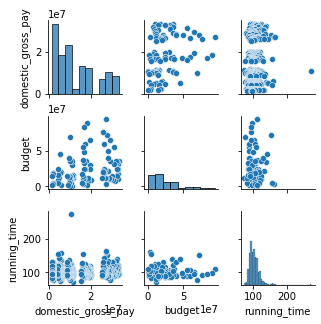

In [19]:
import seaborn as sns
sns.pairplot(copy_movies_page_info[['domestic_gross_pay','budget','running_time']], height = 1.5)

In [58]:
#do log transformation
copy_movies_page_info['log_dom_gross'] = copy_movies_page_info['domestic_gross_pay'].apply(lambda x: np.log(x))
copy_movies_page_info['log_budget'] = copy_movies_page_info['budget'].apply(lambda x: np.log(x))

In [59]:
copy_movies_dummies_info = pd.get_dummies(copy_movies_page_info, columns = ['distributor','first_genre'], drop_first = True)
copy_movies_dummies_info.columns

Index(['title', 'MPAA_rate', 'domestic_gross_pay', 'worldwide_gross_pay',
       'budget', 'lifetime_ranking', 'running_time', 'genre', 'top_director',
       'top_actor', 'second_genre', 'third_genre', 'fourth_genre',
       'log_dom_gross', 'log_budget', 'distributor_Metro-Goldwyn-Mayer (MGM)',
       'distributor_Other_Dist', 'distributor_Paramount Pictures',
       'distributor_Sony Pictures Classics', 'distributor_TriStar Pictures',
       'distributor_Twentieth Century Fox', 'distributor_Universal Pictures',
       'distributor_Walt Disney Studios Motion Pictures',
       'distributor_Warner Bros.', 'first_genre_Adventure',
       'first_genre_Biography', 'first_genre_Comedy',
       'first_genre_Documentary', 'first_genre_Drama',
       'first_genre_Other_First_Genre'],
      dtype='object')

In [82]:
from sklearn.model_selection import train_test_split
X, X_test,y, y_test = train_test_split(copy_movies_dummies_info[[
       'budget', 'running_time', 'log_budget',
        'distributor_Metro-Goldwyn-Mayer (MGM)',
       'distributor_Other_Dist', 'distributor_Paramount Pictures',
       'distributor_Sony Pictures Classics', 'distributor_TriStar Pictures',
       'distributor_Twentieth Century Fox', 'distributor_Universal Pictures',
       'distributor_Walt Disney Studios Motion Pictures',
       'distributor_Warner Bros.']],copy_movies_dummies_info['log_dom_gross'], test_size=0.2,random_state=40)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 379 to 326
Data columns (total 12 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   budget                                           79 non-null     float64
 1   running_time                                     391 non-null    float64
 2   log_budget                                       79 non-null     float64
 3   distributor_Metro-Goldwyn-Mayer (MGM)            400 non-null    uint8  
 4   distributor_Other_Dist                           400 non-null    uint8  
 5   distributor_Paramount Pictures                   400 non-null    uint8  
 6   distributor_Sony Pictures Classics               400 non-null    uint8  
 7   distributor_TriStar Pictures                     400 non-null    uint8  
 8   distributor_Twentieth Century Fox                400 non-null    uint8  
 9   distributor_Universal Pictures

In [225]:
X['running_time'] = X['running_time'].fillna(X['running_time'].median())
X['budget'] = X['budget'].fillna(X['budget'].median())
X['log_budget'] = X['log_budget'].fillna(X['log_budget'].median())
X_test['running_time'] = X_test['running_time'].fillna(X['running_time'].median())
X_test['budget'] = X_test['budget'].fillna(X['budget'].median())
X_test['log_budget'] = X_test['log_budget'].fillna(X_test['log_budget'].median())
X['budget2'] = X['budget']**2
X_test['budget2'] = X_test['budget']**2
X.columns

Index(['budget', 'running_time', 'log_budget',
       'distributor_Metro-Goldwyn-Mayer (MGM)', 'distributor_Other_Dist',
       'distributor_Paramount Pictures', 'distributor_Sony Pictures Classics',
       'distributor_TriStar Pictures', 'distributor_Twentieth Century Fox',
       'distributor_Universal Pictures',
       'distributor_Walt Disney Studios Motion Pictures',
       'distributor_Warner Bros.', 'budget2'],
      dtype='object')

In [226]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression, LassoCV, RidgeCV, ElasticNetCV

lr_model = LinearRegression()
lr_model.fit(X,y)

LinearRegression()

In [227]:
lr_model.score(X,y)

0.13216828045103224

In [228]:
lr_model.score(X_test,y_test)

0.15169698976894497

In [124]:
movies_dummies_corr = copy_movies_dummies_info.corr()[['log_dom_gross','budget','running_time', 'log_budget',
       'distributor_Metro-Goldwyn-Mayer (MGM)', 'distributor_Other_Dist',
       'distributor_Paramount Pictures', 'distributor_Sony Pictures Classics',
       'distributor_TriStar Pictures', 'distributor_Twentieth Century Fox',
       'distributor_Universal Pictures',
       'distributor_Walt Disney Studios Motion Pictures',
       'distributor_Warner Bros.']]
movies_dummies_corr

,log_dom_gross,budget,running_time,log_budget,distributor_Metro-Goldwyn-Mayer (MGM),distributor_Other_Dist,distributor_Paramount Pictures,distributor_Sony Pictures Classics,distributor_TriStar Pictures,distributor_Twentieth Century Fox,distributor_Universal Pictures,distributor_Walt Disney Studios Motion Pictures,distributor_Warner Bros.
domestic_gross_pay,0.926115,0.269961,0.083297,0.332353,-0.018236,-0.240701,0.042940,-0.134515,0.042652,0.120525,0.073611,0.120090,0.106606
worldwide_gross_pay,0.438208,0.404225,0.007707,0.388178,-0.057249,-0.041136,-0.036409,-0.070947,0.013260,0.067217,0.113902,0.047695,-0.011666
budget,0.296528,1.000000,-0.029417,0.790794,0.005011,-0.109818,-0.010631,-0.036332,-0.081153,-0.062906,0.297104,-0.082970,0.064443
lifetime_ranking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
running_time,0.081394,-0.029417,1.000000,-0.090152,0.040584,-0.022302,-0.001657,-0.001571,-0.001162,-0.016485,-0.021718,-0.047609,-0.009938
log_dom_gross,1.000000,0.296528,0.081394,0.340177,-0.009313,-0.260384,0.060183,-0.173071,0.060879,0.144606,0.050656,0.133680,0.105446
log_budget,0.340177,0.790794,-0.090152,1.000000,0.073898,-0.236695,0.056708,0.006813,-0.038496,0.025387,0.218926,0.002109,0.087432
distributor_Metro-Goldwyn-Mayer (MGM),-0.009313,0.005011,0.040584,0.073898,1.000000,-0.197339,-0.076358,-0.045845,-0.049112,-0.078565,-0.093989,-0.081797,-0.108077
distributor_Other_Dist,-0.260384,-0.109818,-0.022302,-0.236695,-0.197339,1.000000,-0.206527,-0.123997,-0.132832,-0.212494,-0.254212,-0.221237,-0.292315
distributor_Paramount Pictures,0.060183,-0.010631,-0.001657,0.056708,-0.076358,-0.206527,1.000000,-0.047980,-0.051398,-0.082223,-0.098365,-0.085606,-0.113109


In [132]:
movies_dummies_corr = copy_movies_dummies_info[['domestic_gross_pay','budget','running_time','distributor_Twentieth Century Fox','distributor_Walt Disney Studios Motion Pictures','distributor_Warner Bros.']].corr()[['domestic_gross_pay','budget','running_time','distributor_Twentieth Century Fox','distributor_Walt Disney Studios Motion Pictures','distributor_Warner Bros.']]
movies_dummies_corr

,domestic_gross_pay,budget,running_time,distributor_Twentieth Century Fox,distributor_Walt Disney Studios Motion Pictures,distributor_Warner Bros.
domestic_gross_pay,1.000000,0.269961,0.083297,0.120525,0.120090,0.106606
budget,0.269961,1.000000,-0.029417,-0.062906,-0.082970,0.064443
running_time,0.083297,-0.029417,1.000000,-0.016485,-0.047609,-0.009938
distributor_Twentieth Century Fox,0.120525,-0.062906,-0.016485,1.000000,-0.088079,-0.116377
distributor_Walt Disney Studios Motion Pictures,0.120090,-0.082970,-0.047609,-0.088079,1.000000,-0.121165
distributor_Warner Bros.,0.106606,0.064443,-0.009938,-0.116377,-0.121165,1.000000


<AxesSubplot:>

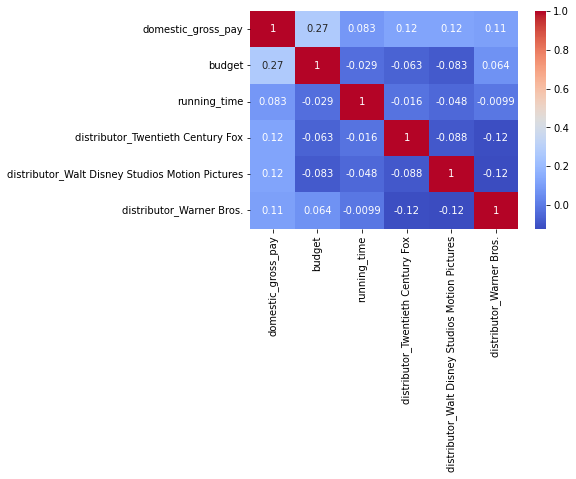

In [135]:
import seaborn as sns
sns.heatmap(movies_dummies_corr,cmap = 'coolwarm', annot=True)

In [71]:

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)


In [229]:
#Standardize data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X.values)
X_std = std.transform(X.values)
X_std_test = std.transform(X_test.values)

In [103]:
#kfold = KFold(n_splits=5, shuffle=True, random_state=40)
#lin_reg_est = LinearRegression()
#scores_train = cross_val_score(lin_reg_est,X,y,cv=kfold)
#scores_test = cross_val_score(lin_reg_est,X_test,y_test,cv=kfold)
#scores_train
#np.mean(scores_train)

In [230]:
#Find LASSO model
import numpy as np
alphavec = 10**np.linspace(-2,2,200)
lasso_model = LassoCV(alphas = alphavec, cv=kfold)
lasso_model.fit(X_std,y)
lasso_model.alpha_
lasso_model.score(X_std,y)

0.1290624541506028

In [231]:
lasso_model.alpha_

0.04008806328898465

In [232]:
list(zip(X.columns,lasso_model.coef_))

[('budget', 0.09680604323260054),
 ('running_time', 0.03315630876223606),
 ('log_budget', -0.0),
 ('distributor_Metro-Goldwyn-Mayer (MGM)', -0.0),
 ('distributor_Other_Dist', -0.19907600138426618),
 ('distributor_Paramount Pictures', 0.0),
 ('distributor_Sony Pictures Classics', -0.09537667390976078),
 ('distributor_TriStar Pictures', 0.0),
 ('distributor_Twentieth Century Fox', 0.05238287449515729),
 ('distributor_Universal Pictures', -0.0),
 ('distributor_Walt Disney Studios Motion Pictures', 0.04108314649580536),
 ('distributor_Warner Bros.', 0.0),
 ('budget2', 0.027474559357158902)]

In [233]:
mask = lasso_model.coef_ > 0.03
coef_list = list(lasso_model.coef_[mask])
coef_list
X.columns[mask]

Index(['budget', 'running_time', 'distributor_Twentieth Century Fox',
       'distributor_Walt Disney Studios Motion Pictures'],
      dtype='object')

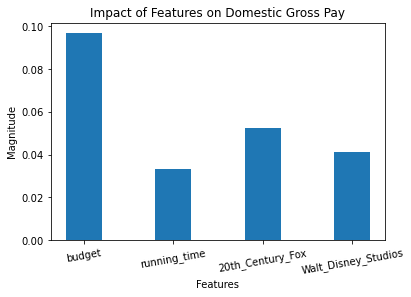

In [234]:
import matplotlib.pyplot as plt
plt.bar(X.columns[mask],coef_list,width=0.4)
#plt.xticks(rotation=35);
plt.xticks([0, 1, 2,3], ['budget', 'running_time', '20th_Century_Fox','Walt_Disney_Studios'], rotation=10)
plt.xlabel('Features')
plt.ylabel('Magnitude')
plt.title('Impact of Features on Domestic Gross Pay');

In [150]:
test_set_pred = lasso_model.predict(X_std_test)

In [98]:
lasso_model.score(X_std_test,y_test)

0.1798993015792858

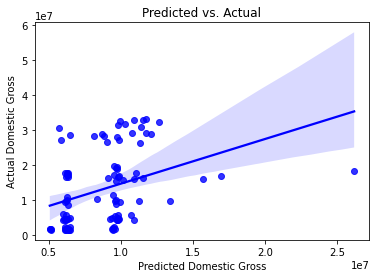

In [212]:
fig = sns.regplot(x=np.exp(test_set_pred),y=np.exp(y_test), color = 'blue')
fig.set(xlabel='Predicted Domestic Gross',ylabel = 'Actual Domestic Gross', \
       title = 'Predicted vs. Actual');

In [179]:
def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

MAE(np.exp(test_set_pred),np.exp(y_test))

8150413.05921166